<a href="https://colab.research.google.com/github/pyGuru123/Python-Space-Science/blob/main/Working%20with%20FITS%20Files/Working_with_FITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Working with FITS in python

Flexible Image Transport System (FITS) is an open standard defining a digital file format useful for storage, transmission and processing of data: formatted as multi-dimensional arrays (for example a 2D image), or tables. FITS is the most commonly used digital file format in astronomy.

FITS is also often used to store non-image data, such as spectra, photon lists, data cubes, or structured data such as multi-table databases. A FITS file may contain several extensions, and each of these may contain a data object. For example, it is possible to store x-ray and infrared exposures in the same file.

Want to tell us what camera, temperature, wind speed, GPS coordinates, astronomical coordinates, height, weight, eye color, and middle name of the photographer, or virtually any other fact about the data contained there is to know? Done. FITS can handle that.

# -----------------------------------------------------------------------#

Here We'll be learning about


1.   Opening and displaying a fits file
2.   Stacking multiple fits files
3.   Writing to a fits file






# Viewing a fits file using Python

Here we'll be learning about the horsehead nebula which is located in the Orion nebula

Orion Nebula : Orion nebula is a diffused nebula located in the south of Orion's belt in Orion's constellation in the milky way. It's so bright that we can see it with naked eyes in the night sky even when it is located 1344±20 light years away from the Earth. Orion nebula is also known as M42 or NGC 1976 and it is one of the most closest region to earth where star formation takes place. It is one of the most intensely studied nebula, and has teached astronomers and cosmologists how stars are formed just from dust and gases

![Orion Nebula](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/300px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg)


Horsehead Nebula : The Horsehead Nebula (also known as Barnard 33) is a small dark nebula in the constellation Orion.The nebula is located just to the south of Alnitak, the easternmost star of Orion's Belt, and is part of the much larger Orion Molecular Cloud Complex.

The Horsehead Nebula is approximately 422 parsecs or 1375 light years from Earth. It is one of the most identifiable nebulae because of its resemblance to a horse's head

![Horsehead Nebula](https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Barnard_33.jpg/250px-Barnard_33.jpg)


Note : 1 parsec = 3.2615 light years


In [ ]:
# installing astropy
!pip install astropy

Importing required libraries

In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

opening file using astropy

In [ ]:
image_file = '/content/drive/My Drive/Colab Notebooks/pySpace/Images/HorseHead.fits'

hdu_list = fits.open(image_file)
print(hdu_list.info())

# hdu stands for header data unit
# hdu is the highest level component of FITS file consisting a list of header and data array or table

Filename: /content/drive/My Drive/Colab Notebooks/pySpace/Images/HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   
None


Extracting image data from hdu list

In [ ]:
image_data = hdu_list[0].data

# print(image_data)
print(type(image_data))
print(image_data.shape)

# a shortcut to do the same thing
# image_data = fits.getdata(image_file)

hdu_list.close()

<class 'numpy.ndarray'>
(893, 891)


Viewing the Image

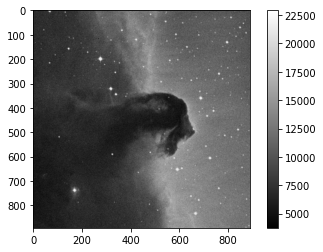

In [ ]:
plt.imshow(image_data,cmap='gray')
plt.colorbar()

extracting statistics from the image file

In [ ]:
print('Min :',np.min(image_data))
print('Max :',np.max(image_data))
print('Mean :',np.mean(image_data))
print('Median :',np.median(image_data))
print('Stdev :',np.std(image_data))

Min : 3759
Max : 22918
Mean : 9831.481676287574
Median : 9658.0
Stdev : 3032.3927542049046


Plotting a histogram with this data

In [ ]:
# To create a histogram, we first have to flatten our 2D array to 1 dimension

print(type(image_data.flatten()))

<class 'numpy.ndarray'>


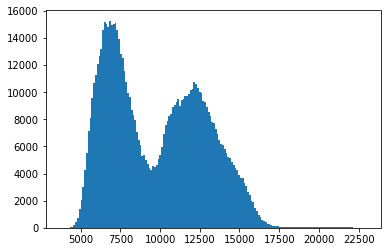

In [ ]:
histogram = plt.hist(image_data.flatten(),bins='auto')

# Image Stacking

Focus stacking (also known as focal plane merging and z-stacking or focus blending) is a digital image processing technique which combines multiple images taken at different focus distances to give a resulting image with a greater depth of field (DOF) than any of the individual source images.

Here We'are working with M13 Galaxy

M13 : Messier 13 or M13, also designated NGC 6205 and sometimes called the Great Globular Cluster in Hercules or the Hercules Globular Cluster, is a globular cluster of several hundred thousand stars in the constellation of Hercules.

![M13](https://www.astronomytrek.com/wp-content/uploads/2017/06/Messier-13.jpg)

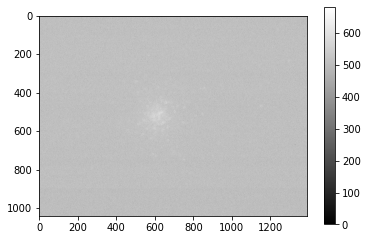

In [ ]:
# non stacked image

base_url = '/content/drive/My Drive/Colab Notebooks/pySpace/Images/M13_blue/M13_blue_0005.fits'

image_data = fits.getdata(base_url)

plt.imshow(image_data,cmap='gray')
plt.colorbar()

In [ ]:
base_url = '/content/drive/My Drive/Colab Notebooks/pySpace/Images/M13_blue/M13_blue_000{}.fits'

image_list = [base_url.format(i) for i in range(1,6)]
image_concat = [fits.getdata(image) for image in image_list]

# Concatenating the image data 

final_image = np.zeros(shape=image_concat[0].shape)
for image in image_concat:
    final_image += image

before showing the image, we need to find the best stretch. To find that, first make the histogram of the image

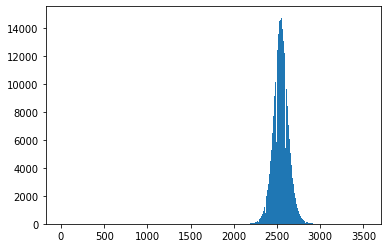

In [ ]:
image_hist = plt.hist(final_image.flatten(),bins='auto')

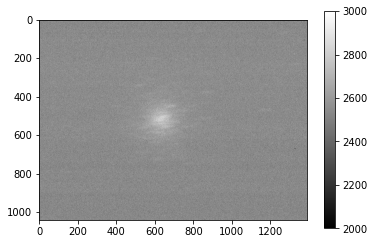

In [ ]:
plt.imshow(final_image,cmap='gray',vmin=2.e3,vmax=3.e3)
plt.colorbar()

# Writing to FITS file

Let's write the above generated image to a fits file and then we'll download it to our system

In [ ]:
# data can be written to a fits file using writeto() method
# set overwrite=True to overwrite a already existing image

out_file = 'M13_blue_stacked.fits'

hdu = fits.PrimaryHDU(final_image)
hdu.writeto(out_file,overwrite=True)

In [ ]:
# from google.colab import files
# files.download(out_file)